## Importing Libraries


In [367]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data pre processing


### Fetch data


In [368]:
data=pd.read_csv('/home/nailsonseat/Desktop/Datasets/dataset_sunny.csv')
data

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [369]:
rootLabels=data.columns.to_numpy()
data=data.to_numpy().T

### Extract training and test data


In [370]:
print(data.shape)

(5, 14)


In [371]:
def dataSplit(data,fraction):
    indices=np.arange(data.shape[1])
    np.random.shuffle(indices)
    data=data[:,indices]
    length=data.shape[1]-int(data.shape[1]*fraction)
    indices=np.arange(length)
    train,train_labels=data[:-1,:length],data[-1,:length]
    test,test_labels=data[:-1,length:],data[-1,length:]
    return train,train_labels,test,test_labels
    

In [372]:
X,Y,X_t,Y_t=dataSplit(data,0.3)
print(Y)
pd.DataFrame(X)


['no' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes']


,0,1,2,3,4,5,6,7,8,9
0,sunny,rainy,rainy,sunny,rainy,rainy,overcast,sunny,overcast,sunny
1,hot,cool,mild,mild,cool,mild,cool,mild,hot,cool
2,high,normal,high,high,normal,normal,normal,normal,normal,normal
3,False,False,False,False,True,False,True,True,False,False


### Print shapes


In [373]:
print(X.shape)
print(Y.shape)
print(rootLabels)

(4, 10)
(10,)
['Outlook' 'Temperature' 'Humidity' 'Windy' 'Play']


## Naive Bayes


### Frequency function


In [374]:
uniqueLabels=[]

In [375]:
def frequency(data,labels):
    frequency={}
    for i in range(len(data)):
        for j in range(len(data[i])):
            label=labels[i]+' '+str(data[i,j])
            if label not in uniqueLabels:
                uniqueLabels.append(label)
            if label not in frequency:
                frequency[label]=1
            else:
                frequency[label]+=1
    return frequency

### Histogram for affecting factors vs frequency days


In [376]:
def histogram(data,title,x_label,y_label):  
    fig = plt.figure(figsize = (20, 5))
    labels=[]
    values=[]
    for i in range(len(data)):
            labels.append(data[i][0])
            values.append(data[i][1])
    plt.bar(labels,values, color ='blue',
            width = 0.2)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### Adding pseudocounts

In [377]:
def pseudoCounts(frequencies,labels):
    for i in labels:
        if i not in frequencies:
            frequencies[i]=1
        else:
            frequencies[i]+=1
    return frequencies

### Frequency Plot for Playable days


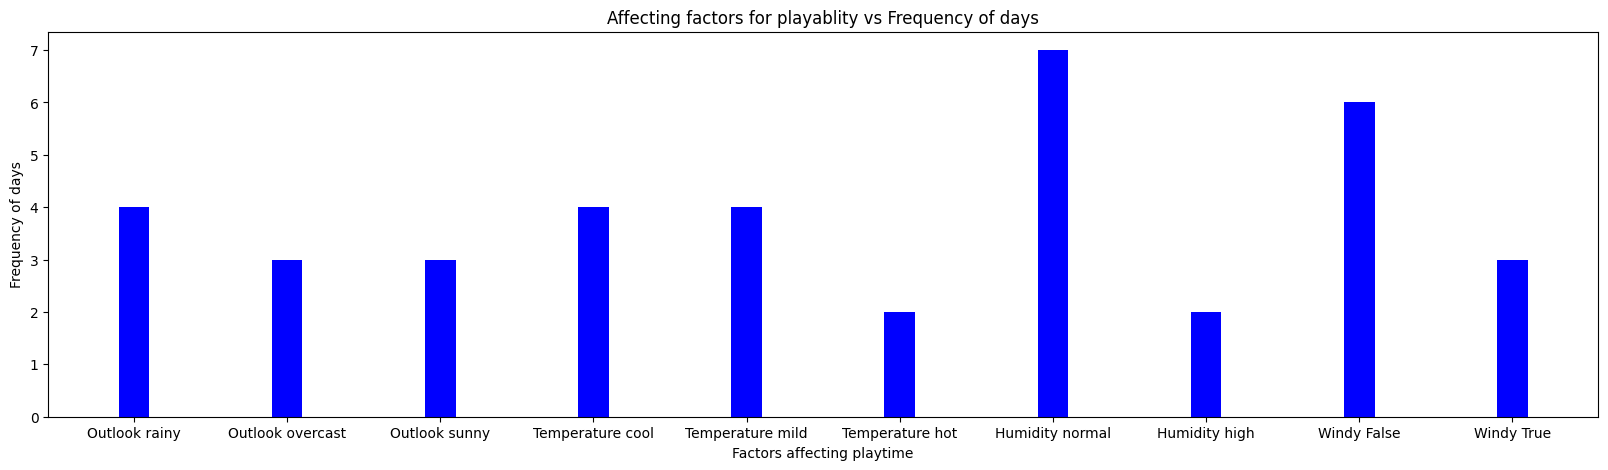

In [378]:
indices=np.where(Y=='yes')[0]
frequencies_playable=frequency(X[:,indices],rootLabels)
frequencies_playable=pseudoCounts(frequencies_playable,uniqueLabels)
histogram(list(frequencies_playable.items()),"Affecting factors for playablity vs Frequency of days","Factors affecting playtime","Frequency of days")

### Frequency Plot for Non - Playable days


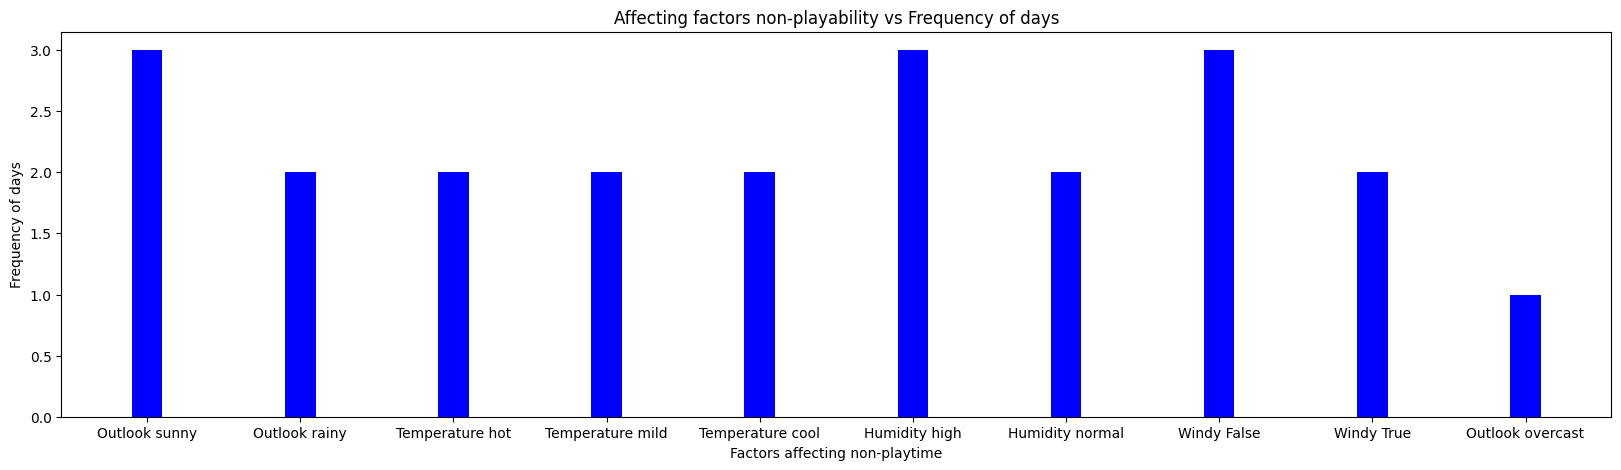

In [379]:
indices=np.where(Y=='no')[0]
frequencies_non_playable=frequency(X[:,indices],rootLabels)
frequencies_non_playable=pseudoCounts(frequencies_non_playable,uniqueLabels)
histogram(list(frequencies_non_playable.items()),"Affecting factors non-playability vs Frequency of days","Factors affecting non-playtime","Frequency of days")

### Prior probabilities


In [380]:
count={}
for i in Y:
    try:
        count[i]+=1
    except KeyError:
        count[i]=1
count

{'no': 3, 'yes': 7}

In [381]:
prior_playability=count['yes']/(count['yes']+count['no'])
prior_playability

0.7

In [382]:
prior_non_playability=count['no']/(count['yes']+count['no'])
prior_non_playability

0.3

### Playable features probability


In [383]:
frequencies_playable

{'Outlook rainy': 4,
 'Outlook overcast': 3,
 'Outlook sunny': 3,
 'Temperature cool': 4,
 'Temperature mild': 4,
 'Temperature hot': 2,
 'Humidity normal': 7,
 'Humidity high': 2,
 'Windy False': 6,
 'Windy True': 3}

In [384]:
playable_feature_probability={}
total_playable_features=0
for i in uniqueLabels:
    total_playable_features+=frequencies_playable[i]
for i in uniqueLabels:
    playable_feature_probability[i]=frequencies_playable[i]/total_playable_features

In [385]:
playable_feature_probability

{'Outlook rainy': 0.10526315789473684,
 'Outlook overcast': 0.07894736842105263,
 'Outlook sunny': 0.07894736842105263,
 'Temperature cool': 0.10526315789473684,
 'Temperature mild': 0.10526315789473684,
 'Temperature hot': 0.05263157894736842,
 'Humidity normal': 0.18421052631578946,
 'Humidity high': 0.05263157894736842,
 'Windy False': 0.15789473684210525,
 'Windy True': 0.07894736842105263}

### Non-playable features probability


In [386]:
frequencies_non_playable

{'Outlook sunny': 3,
 'Outlook rainy': 2,
 'Temperature hot': 2,
 'Temperature mild': 2,
 'Temperature cool': 2,
 'Humidity high': 3,
 'Humidity normal': 2,
 'Windy False': 3,
 'Windy True': 2,
 'Outlook overcast': 1}

In [387]:
non_playable_feature_probability={}
total_non_playable_features=0
for i in uniqueLabels:
    total_non_playable_features+=frequencies_non_playable[i]
for i in uniqueLabels:
    non_playable_feature_probability[i]=frequencies_non_playable[i]/total_non_playable_features

In [388]:
non_playable_feature_probability

{'Outlook rainy': 0.09090909090909091,
 'Outlook overcast': 0.045454545454545456,
 'Outlook sunny': 0.13636363636363635,
 'Temperature cool': 0.09090909090909091,
 'Temperature mild': 0.09090909090909091,
 'Temperature hot': 0.09090909090909091,
 'Humidity normal': 0.09090909090909091,
 'Humidity high': 0.13636363636363635,
 'Windy False': 0.13636363636363635,
 'Windy True': 0.09090909090909091}

## Testing Model

In [389]:
X_t

array([['rainy', 'overcast', 'sunny', 'overcast'],
       ['mild', 'mild', 'hot', 'hot'],
       ['high', 'high', 'high', 'high'],
       [True, True, True, False]], dtype=object)

In [401]:
answers=[]
for i in X_t:
    playable_probability=prior_playability
    for j in i:
        for k in uniqueLabels:
            if k.find(str(j))!=-1:
                playable_probability*=playable_feature_probability[k]
    non_playable_probability=prior_non_playability
    for j in i:
        for k in uniqueLabels:
            if k.find(str(j))!=-1:
                non_playable_probability*=non_playable_feature_probability[k]
    if playable_probability>=non_playable_probability:
        answers.append('yes')
    else:
        answers.append('no')

In [409]:
print(answers)

['yes', 'yes', 'no', 'yes']


In [410]:
print(Y_t)

['no' 'yes' 'no' 'yes']
